In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

### 0. 데이터 로딩 및 확인

In [2]:
lemon = pd.read_csv('data/lemon.csv', encoding='euc-kr', index_col='ID')
lemon.head()

,lemon,구매일자,판매처,연식,차량연령,제조사,모델명,트림,세부모델명,색상,...,현재평균상태소매가격,현재평균이상상태소매가격,프리미엄여부,차량보증,구매자ID,구매지우편번호,구매주,취득비용,온라인판매여부,보증금액
ID,,,,,,,,,,,,,,,,,,,,,
1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [3]:
lemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lemon           72983 non-null  int64  
 1   구매일자            72983 non-null  object 
 2   판매처             72983 non-null  object 
 3   연식              72983 non-null  int64  
 4   차량연령            72983 non-null  int64  
 5   제조사             72983 non-null  object 
 6   모델명             72983 non-null  object 
 7   트림              70623 non-null  object 
 8   세부모델명           72975 non-null  object 
 9   색상              72975 non-null  object 
 10  변속기             72974 non-null  object 
 11  휠타입ID           69814 non-null  float64
 12  휠타입명            69809 non-null  object 
 13  운행거리            72983 non-null  int64  
 14  생산국가            72978 non-null  object 
 15  차량크기            72978 non-null  object 
 16  미국제조사명          72978 non-null  object 
 17  구매당시평균상태차량가격    72965 non-null 

In [4]:
col = ['휠타입ID']
lemon = lemon.drop(columns=col)
lemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lemon           72983 non-null  int64  
 1   구매일자            72983 non-null  object 
 2   판매처             72983 non-null  object 
 3   연식              72983 non-null  int64  
 4   차량연령            72983 non-null  int64  
 5   제조사             72983 non-null  object 
 6   모델명             72983 non-null  object 
 7   트림              70623 non-null  object 
 8   세부모델명           72975 non-null  object 
 9   색상              72975 non-null  object 
 10  변속기             72974 non-null  object 
 11  휠타입명            69809 non-null  object 
 12  운행거리            72983 non-null  int64  
 13  생산국가            72978 non-null  object 
 14  차량크기            72978 non-null  object 
 15  미국제조사명          72978 non-null  object 
 16  구매당시평균상태차량가격    72965 non-null  float64
 17  구매당시평균이상상태차량가격  72965 non-null 

### 1. 데이터 타입 조정

In [5]:
lemon.구매일자 = pd.to_datetime(lemon.구매일자)
lemon.구매자ID = 'UID'+lemon.구매자ID.astype('str')
lemon.구매지우편번호 = 'ZIP'+lemon.구매지우편번호.astype('str')
lemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   lemon           72983 non-null  int64         
 1   구매일자            72983 non-null  datetime64[ns]
 2   판매처             72983 non-null  object        
 3   연식              72983 non-null  int64         
 4   차량연령            72983 non-null  int64         
 5   제조사             72983 non-null  object        
 6   모델명             72983 non-null  object        
 7   트림              70623 non-null  object        
 8   세부모델명           72975 non-null  object        
 9   색상              72975 non-null  object        
 10  변속기             72974 non-null  object        
 11  휠타입명            69809 non-null  object        
 12  운행거리            72983 non-null  int64         
 13  생산국가            72978 non-null  object        
 14  차량크기            72978 non-null  object        
 15  미국

In [6]:
lemon_cat = lemon.select_dtypes(['object'])
lemon_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   판매처      72983 non-null  object
 1   제조사      72983 non-null  object
 2   모델명      72983 non-null  object
 3   트림       70623 non-null  object
 4   세부모델명    72975 non-null  object
 5   색상       72975 non-null  object
 6   변속기      72974 non-null  object
 7   휠타입명     69809 non-null  object
 8   생산국가     72978 non-null  object
 9   차량크기     72978 non-null  object
 10  미국제조사명   72978 non-null  object
 11  프리미엄여부   3419 non-null   object
 12  차량보증     3419 non-null   object
 13  구매자ID    72983 non-null  object
 14  구매지우편번호  72983 non-null  object
 15  구매주      72983 non-null  object
dtypes: object(16)
memory usage: 9.5+ MB


In [7]:
lemon = lemon.select_dtypes(['number','datetime'])
lemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   lemon           72983 non-null  int64         
 1   구매일자            72983 non-null  datetime64[ns]
 2   연식              72983 non-null  int64         
 3   차량연령            72983 non-null  int64         
 4   운행거리            72983 non-null  int64         
 5   구매당시평균상태차량가격    72965 non-null  float64       
 6   구매당시평균이상상태차량가격  72965 non-null  float64       
 7   구매당시평균상태소매가격    72965 non-null  float64       
 8   구매당시평균이상상태소매가격  72965 non-null  float64       
 9   현재평균상태가격        72668 non-null  float64       
 10  현재평균이상상태가격      72668 non-null  float64       
 11  현재평균상태소매가격      72668 non-null  float64       
 12  현재평균이상상태소매가격    72668 non-null  float64       
 13  취득비용            72983 non-null  float64       
 14  온라인판매여부         72983 non-null  int64         
 15  보증

### 2. 범주형변수처리

In [8]:
lemon_cat.nunique()

판매처           3
제조사          33
모델명        1063
트림          134
세부모델명       863
색상           16
변속기           3
휠타입명          3
생산국가          4
차량크기         12
미국제조사명        4
프리미엄여부        2
차량보증          2
구매자ID        74
구매지우편번호     153
구매주          37
dtype: int64

In [9]:
col = ['트림','세부모델명','구매주']
lemon_cat = lemon_cat.drop(columns=col)
lemon_cat.nunique()

판매처           3
제조사          33
모델명        1063
색상           16
변속기           3
휠타입명          3
생산국가          4
차량크기         12
미국제조사명        4
프리미엄여부        2
차량보증          2
구매자ID        74
구매지우편번호     153
dtype: int64

In [10]:
lemon_cat.isnull().sum()

판매처            0
제조사            0
모델명            0
색상             8
변속기            9
휠타입명        3174
생산국가           5
차량크기           5
미국제조사명         5
프리미엄여부     69564
차량보증       69564
구매자ID          0
구매지우편번호        0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


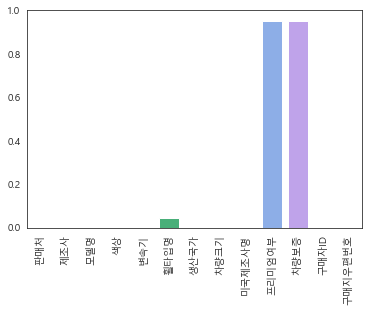

In [11]:
sns.barplot(lemon_cat.columns, lemon_cat.isnull().mean())
plt.xticks(rotation=90);

In [12]:
lemon_cat = lemon_cat.fillna('OTHERS')
lemon_cat.isnull().sum()

판매처        0
제조사        0
모델명        0
색상         0
변속기        0
휠타입명       0
생산국가       0
차량크기       0
미국제조사명     0
프리미엄여부     0
차량보증       0
구매자ID      0
구매지우편번호    0
dtype: int64

#### 2.1. 범주형 변수 시각화

In [13]:
graph_cols = list(lemon_cat.columns[(lemon_cat.nunique()<20).values])
graph_cols

['판매처', '색상', '변속기', '휠타입명', '생산국가', '차량크기', '미국제조사명', '프리미엄여부', '차량보증']

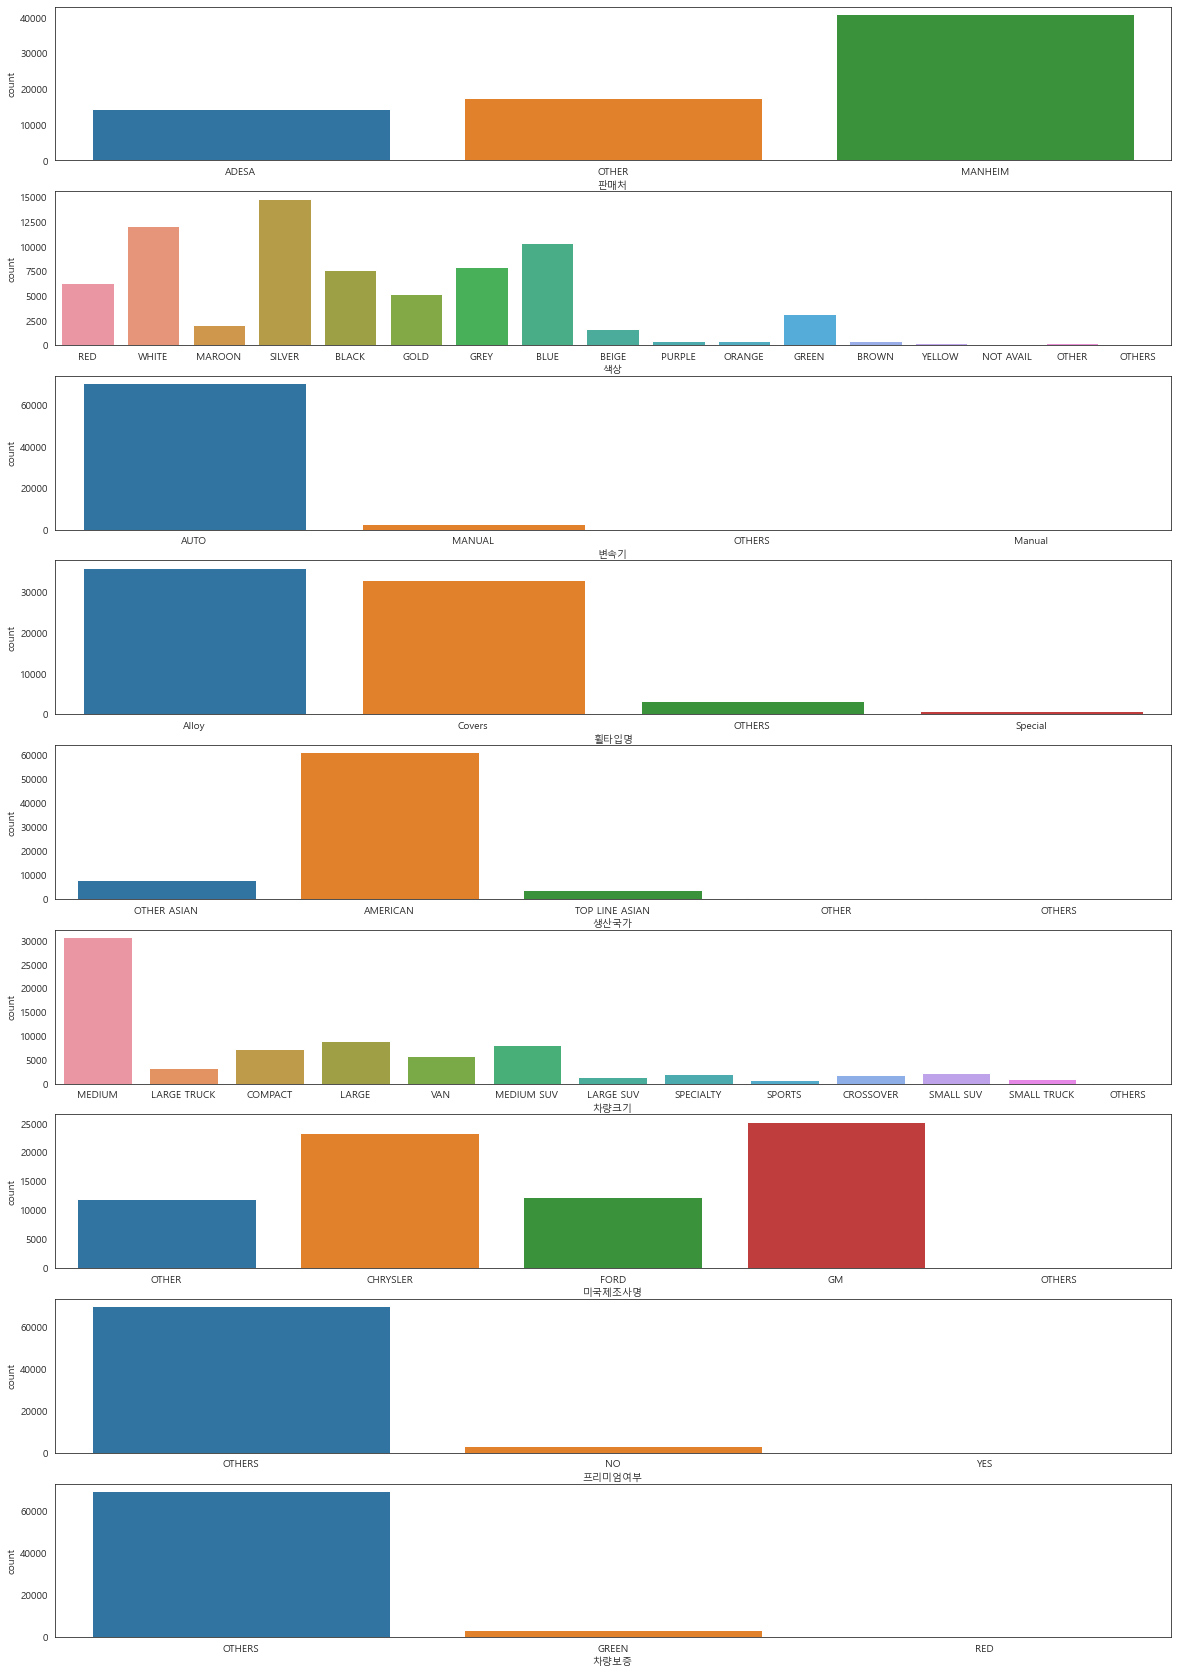

In [14]:
fig, ax = plt.subplots(nrows=len(graph_cols), ncols=1, figsize=(20,30))
for i, a in zip(graph_cols, ax):
    sns.countplot(x=i, data=lemon_cat, ax=a)

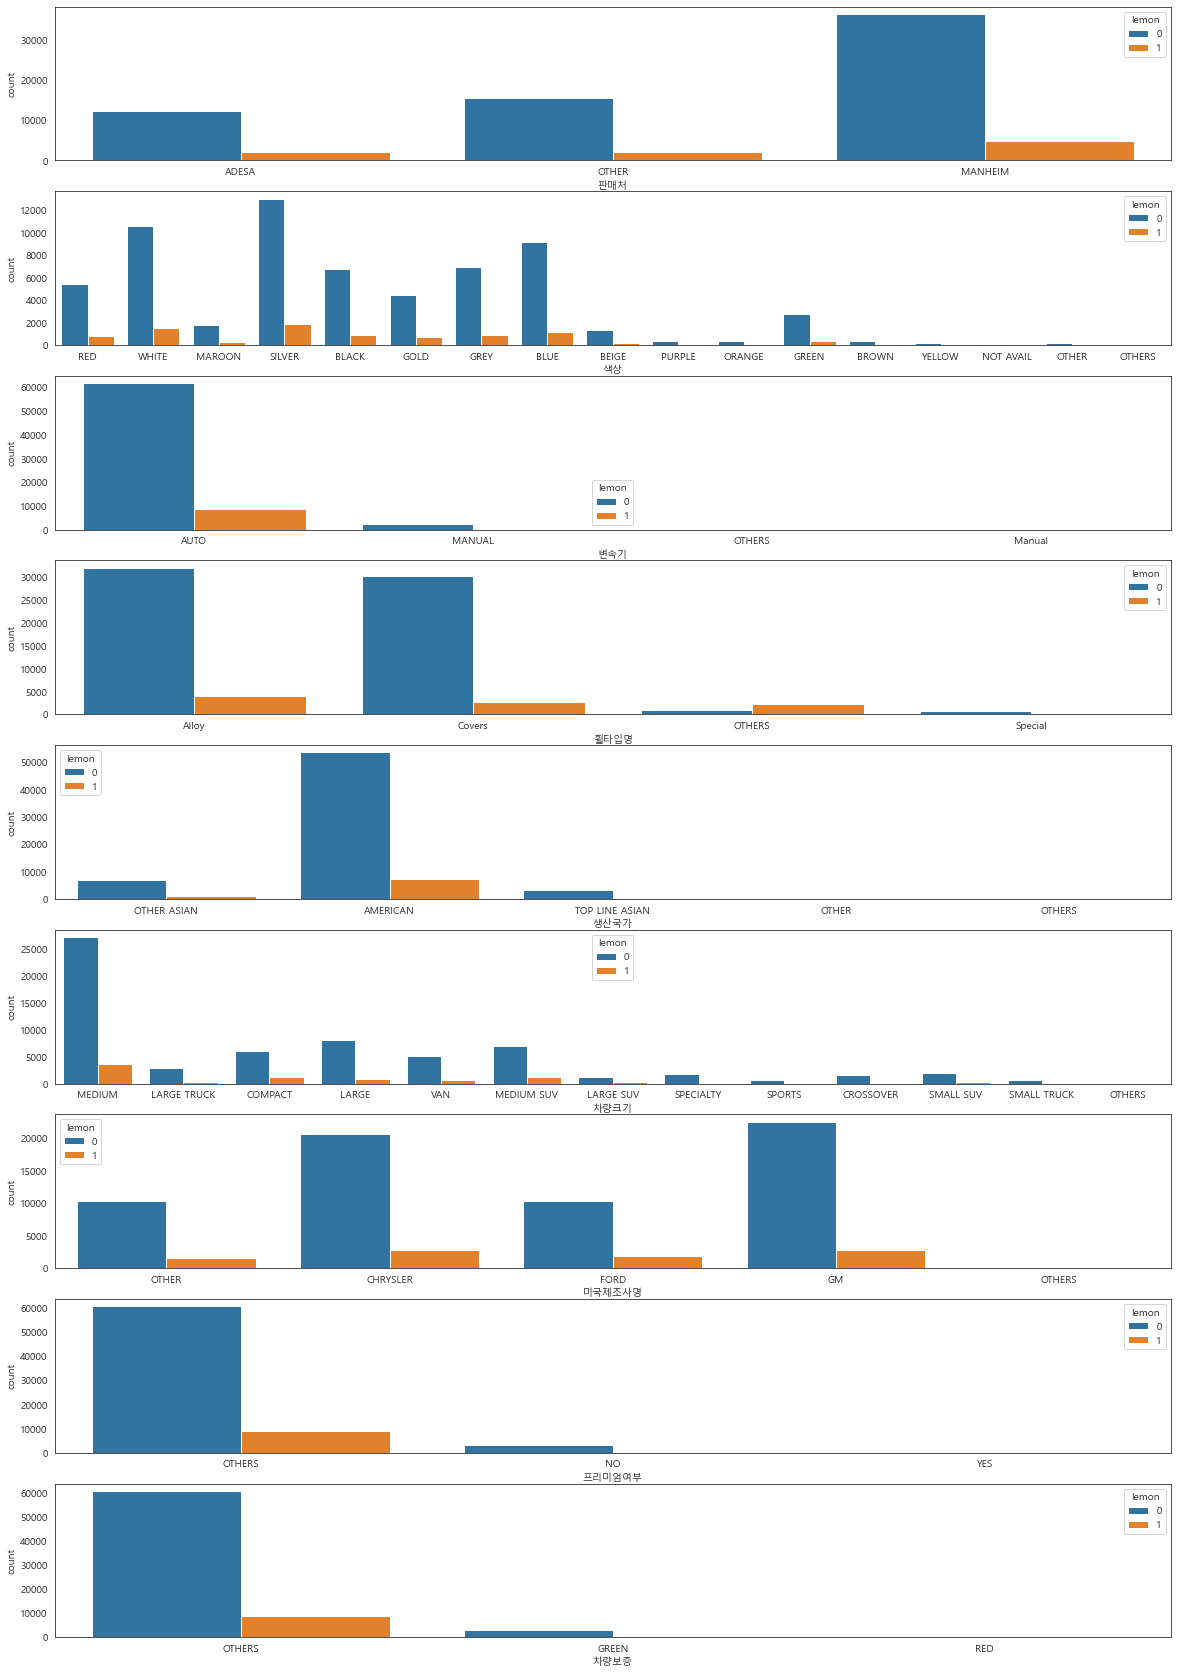

In [15]:
fig, ax = plt.subplots(nrows=len(graph_cols), ncols=1, figsize=(20,30))
for i, a in zip(graph_cols, ax):
    sns.countplot(x=i, data=lemon_cat, hue=lemon['lemon'], ax=a)

#### 2.2. 범주형 변수 수치화

In [16]:
lemon_cat.nunique()

판매처           3
제조사          33
모델명        1063
색상           17
변속기           4
휠타입명          4
생산국가          5
차량크기         13
미국제조사명        5
프리미엄여부        3
차량보증          3
구매자ID        74
구매지우편번호     153
dtype: int64

- 판매처 : 원-핫인코딩
- 제조사 : 바이너리인코딩
- 모델명 : Mean Encoding
- 색상 : 이진변환(무채색여부)
- 변속기 : 이진변환(Auto여부)
- 휠타입명 : 원-핫인코딩
- 생산국가 : OTHER, OTHERS -> OTHER ASIAN으로 변경 후 원-핫인코딩
- 차량크기 : 바이너리인코딩
- 프리미엄여부 : 원-핫인코딩
- 차량보증 : 원-핫인코딩
- 구매자ID : Mean Encoding
- 구매지우편번호 : Mean Encoding

#### 바이너리인코딩 예제

In [17]:
bin(33)

'0b100001'

In [18]:
제조사_bin = ['%06d' % int(bin(i)[2:]) for i in pd.Categorical(lemon_cat.제조사).codes]
제조사_bin = pd.DataFrame([list(i) for i in 제조사_bin], columns = ['제조사_bin%02d' % (i+1) for i in range(6)], index=lemon.index).astype('int')
lemon = lemon.join(제조사_bin)
lemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   lemon           72983 non-null  int64         
 1   구매일자            72983 non-null  datetime64[ns]
 2   연식              72983 non-null  int64         
 3   차량연령            72983 non-null  int64         
 4   운행거리            72983 non-null  int64         
 5   구매당시평균상태차량가격    72965 non-null  float64       
 6   구매당시평균이상상태차량가격  72965 non-null  float64       
 7   구매당시평균상태소매가격    72965 non-null  float64       
 8   구매당시평균이상상태소매가격  72965 non-null  float64       
 9   현재평균상태가격        72668 non-null  float64       
 10  현재평균이상상태가격      72668 non-null  float64       
 11  현재평균상태소매가격      72668 non-null  float64       
 12  현재평균이상상태소매가격    72668 non-null  float64       
 13  취득비용            72983 non-null  float64       
 14  온라인판매여부         72983 non-null  int64         
 15  보증

#### Mean Encoding 예제 1: 기본 Encoding

In [19]:
lemon_cat = lemon_cat.join(lemon['lemon'])
lemon_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   판매처      72983 non-null  object
 1   제조사      72983 non-null  object
 2   모델명      72983 non-null  object
 3   색상       72983 non-null  object
 4   변속기      72983 non-null  object
 5   휠타입명     72983 non-null  object
 6   생산국가     72983 non-null  object
 7   차량크기     72983 non-null  object
 8   미국제조사명   72983 non-null  object
 9   프리미엄여부   72983 non-null  object
 10  차량보증     72983 non-null  object
 11  구매자ID    72983 non-null  object
 12  구매지우편번호  72983 non-null  object
 13  lemon    72983 non-null  int64 
dtypes: int64(1), object(13)
memory usage: 10.4+ MB


In [20]:
lemon['모델명'] = lemon_cat['모델명'].map(lemon_cat.groupby('모델명')['lemon'].mean())

#### Mean Encoding 예제 2: Smoothing

In [21]:
n_size = lemon_cat.groupby('모델명').size()
global_mean = lemon.lemon.mean()
alpha = 0.7 # alpha값이 크면 클수록 smooth -> 평균에 가깝게

def smoothing(n_rows, target_mean):
    return (target_mean*n_rows + global_mean*alpha) / (n_rows + alpha)

lemon_cat.apply(lambda x: smoothing(n_size, lemon_cat.groupby('모델명')['lemon'].mean()))['모델명']

모델명
1500 RAM PICKUP 2WD     0.116262
1500 RAM PICKUP 4WD     0.105478
1500 SIERRA PICKUP 2    0.083543
1500 SIERRA PICKUP 4    0.018317
1500 SILVERADO PICKU    0.090642
                          ...   
YUKON XL 1500 4WD       0.190542
YUKON XL 1500 4WD 5.    0.443849
YUKON XL 1500 AWD 6.    0.031886
ZEPHYR                  0.111968
ZEPHYR 3.0L V6 SFI      0.443849
Name: 모델명, Length: 1063, dtype: float64

#### 이진변환

In [22]:
non_col = ['WHITE','GREY','BLACK','SILVER']
lemon['무채색여부'] = lemon_cat.색상.isin(non_col).astype('int')
lemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   lemon           72983 non-null  int64         
 1   구매일자            72983 non-null  datetime64[ns]
 2   연식              72983 non-null  int64         
 3   차량연령            72983 non-null  int64         
 4   운행거리            72983 non-null  int64         
 5   구매당시평균상태차량가격    72965 non-null  float64       
 6   구매당시평균이상상태차량가격  72965 non-null  float64       
 7   구매당시평균상태소매가격    72965 non-null  float64       
 8   구매당시평균이상상태소매가격  72965 non-null  float64       
 9   현재평균상태가격        72668 non-null  float64       
 10  현재평균이상상태가격      72668 non-null  float64       
 11  현재평균상태소매가격      72668 non-null  float64       
 12  현재평균이상상태소매가격    72668 non-null  float64       
 13  취득비용            72983 non-null  float64       
 14  온라인판매여부         72983 non-null  int64         
 15  보증

### 3. 수치형변수의 처리 및 확인

In [23]:
col = ['lemon','연식','차량연령', '운행거리', '구매당시평균상태차량가격']
my_df = lemon[col]
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lemon         72983 non-null  int64  
 1   연식            72983 non-null  int64  
 2   차량연령          72983 non-null  int64  
 3   운행거리          72983 non-null  int64  
 4   구매당시평균상태차량가격  72965 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 5.4 MB


- viloin plot

In [24]:
graph_data = pd.melt(my_df, id_vars='lemon', var_name='변수', value_name='값')
graph_data.head()

,lemon,변수,값
0,0,연식,2006.0
1,0,연식,2004.0
2,0,연식,2005.0
3,0,연식,2004.0
4,0,연식,2005.0


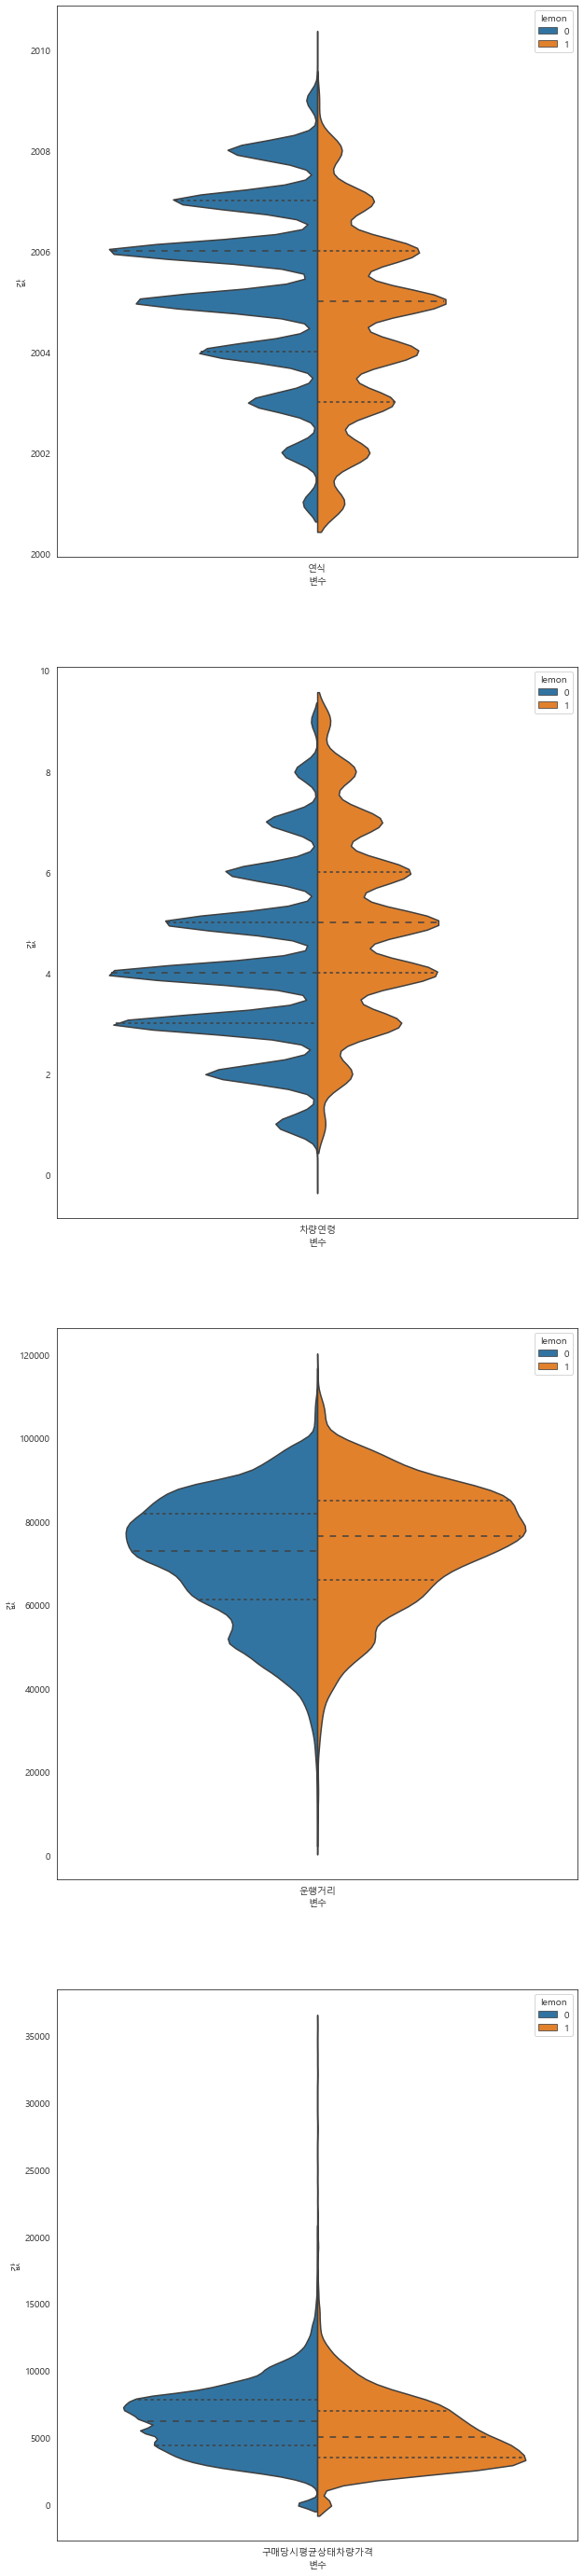

In [25]:
fig, ax = plt.subplots(nrows=graph_data.변수.nunique(), ncols=1, figsize=(10,50))
for i, a in zip(graph_data.변수.unique(), ax):
    sns.violinplot(x='변수', y='값', hue='lemon', data=graph_data[graph_data.변수==i], ax=a, inner='quartile', split=True)

- box plot

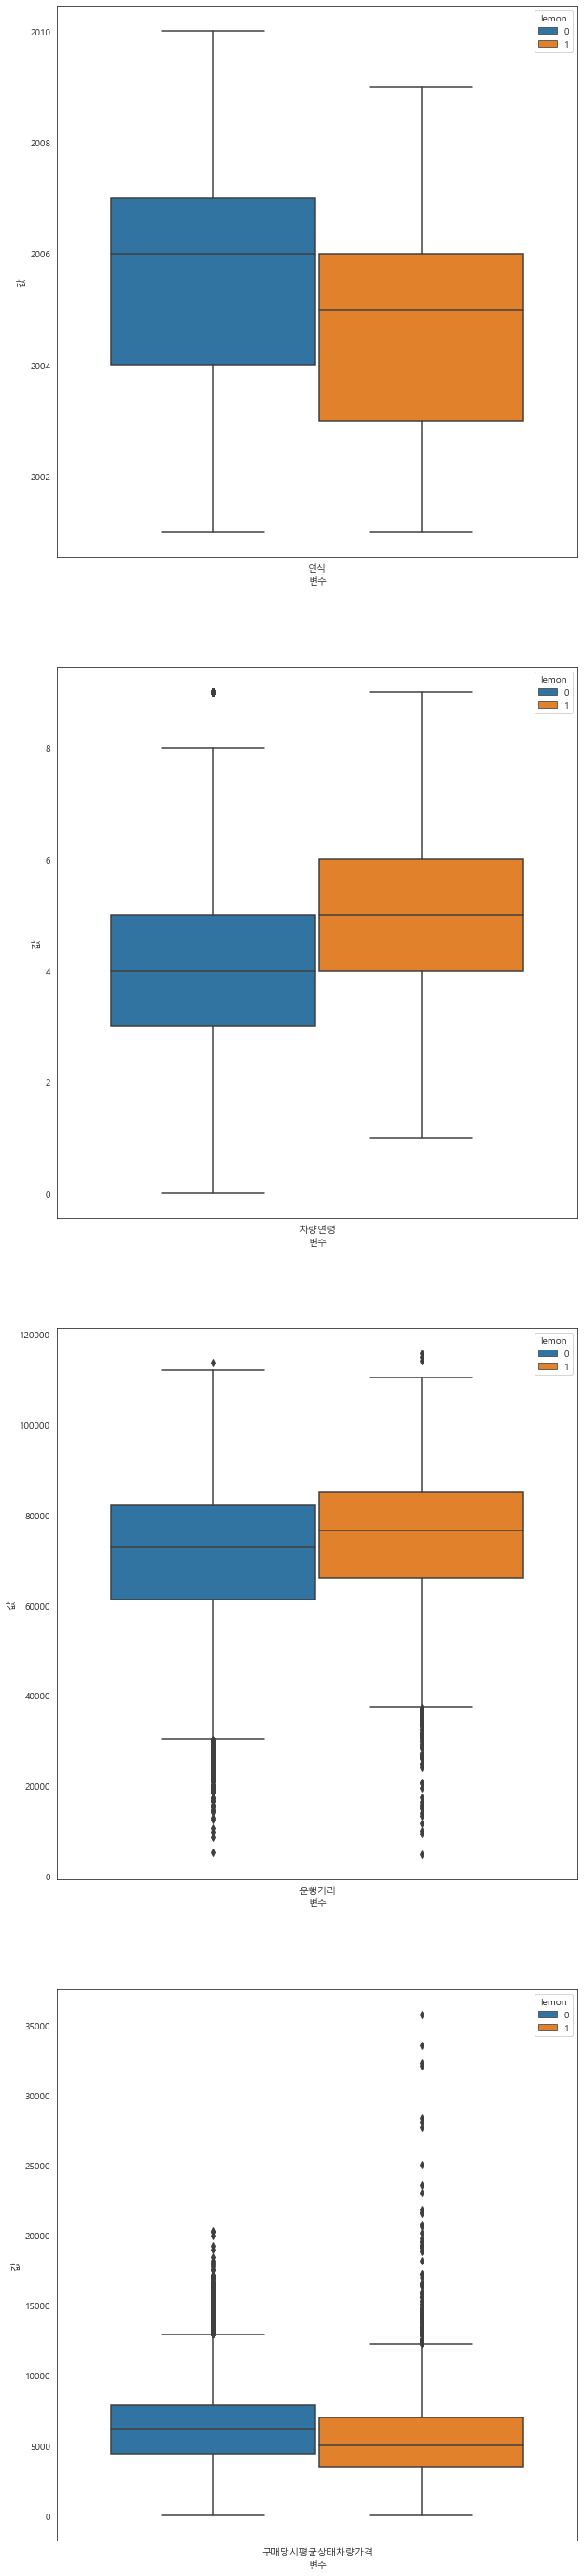

In [26]:
fig, ax = plt.subplots(nrows=graph_data.변수.nunique(), ncols=1, figsize=(10,50))
for i, a in zip(graph_data.변수.unique(), ax):
    sns.boxplot(x='변수', y='값', hue='lemon', data=graph_data[graph_data.변수==i], ax=a)

- 이상치 처리

In [27]:
my_df.describe().T

,count,mean,std,min,25%,50%,75%,max
lemon,72983.0,0.122988,0.328425,0.0,0.0,0.0,0.0,1.0
연식,72983.0,2005.343052,1.731252,2001.0,2004.0,2005.0,2007.0,2010.0
차량연령,72983.0,4.176644,1.712210,0.0,3.0,4.0,5.0,9.0
운행거리,72983.0,71499.995917,14578.913128,4825.0,61837.0,73361.0,82436.0,115717.0
구매당시평균상태차량가격,72965.0,6128.909217,2461.992768,0.0,4273.0,6097.0,7765.0,35722.0


In [28]:
IQR = my_df.운행거리.quantile(0.75) - my_df.운행거리.quantile(0.25)
u_w = my_df.운행거리.quantile(0.75) + (1.5*IQR)
my_df.운행거리 = my_df.운행거리.clip(upper=u_w)
my_df.describe().T

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,count,mean,std,min,25%,50%,75%,max
lemon,72983.0,0.122988,0.328425,0.0,0.0,0.0,0.0,1.0
연식,72983.0,2005.343052,1.731252,2001.0,2004.0,2005.0,2007.0,2010.0
차량연령,72983.0,4.176644,1.712210,0.0,3.0,4.0,5.0,9.0
운행거리,72983.0,71499.924585,14578.704047,4825.0,61837.0,73361.0,82436.0,113334.5
구매당시평균상태차량가격,72965.0,6128.909217,2461.992768,0.0,4273.0,6097.0,7765.0,35722.0


In [29]:
c = my_df.구매당시평균상태차량가격>100
my_df.구매당시평균상태차량가격 = my_df.구매당시평균상태차량가격.where(c, other=100)
my_df.describe().T

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,count,mean,std,min,25%,50%,75%,max
lemon,72983.0,0.122988,0.328425,0.0,0.0,0.0,0.0,1.0
연식,72983.0,2005.343052,1.731252,2001.0,2004.0,2005.0,2007.0,2010.0
차량연령,72983.0,4.176644,1.712210,0.0,3.0,4.0,5.0,9.0
운행거리,72983.0,71499.924585,14578.704047,4825.0,61837.0,73361.0,82436.0,113334.5
구매당시평균상태차량가격,72983.0,6128.556801,2460.708152,100.0,4273.0,6096.0,7765.0,35722.0
